#**CS106 ML Project on Linear Regression**
## **Topic**: CO2 Emission by Cars
### By - 23/CS/147 Divyansh Singh, 23/CS/152 Garvit Bansal, 23/CS/160 Guneet Toppo

---



# **Importing Basic Libraries & Loading Dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("CO2_Emissions.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [ ]:
print("No. of Colomns & Rows: ",df.shape)

No. of Colomns & Rows:  (7385, 12)


# **Data Preprocessing**
(Checking for NULL values, data-type of each column, replacing categorical columns with numericals columns)

In [ ]:
null_values = df.isnull().sum()
null_values

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [ ]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Fuel Type'] = le.fit_transform(df['Fuel Type'])
df['Transmission'] = le.fit_transform(df['Transmission'])
df.head(7)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,14,4,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,25,4,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,22,4,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,15,4,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,15,4,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,15,4,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,15,4,11.8,8.1,10.1,28,232


# **Data Visualization**

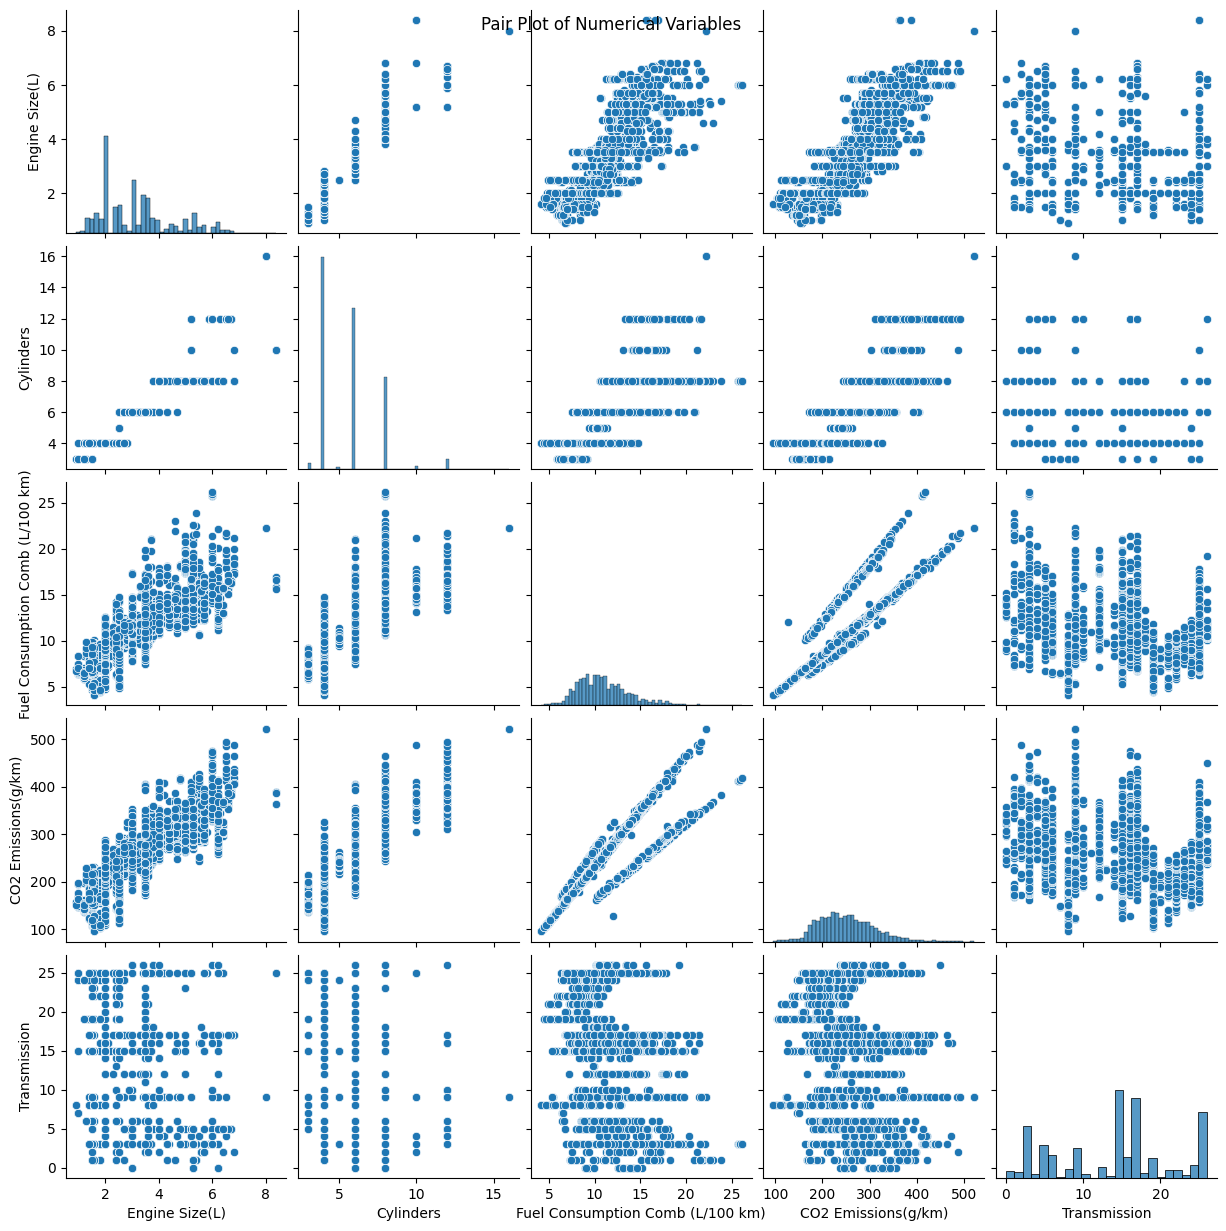

In [ ]:
numerical_cols = ['Engine Size(L)', 'Cylinders',
                  'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)','Transmission']

sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Variables')
plt.show()

<Axes: xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

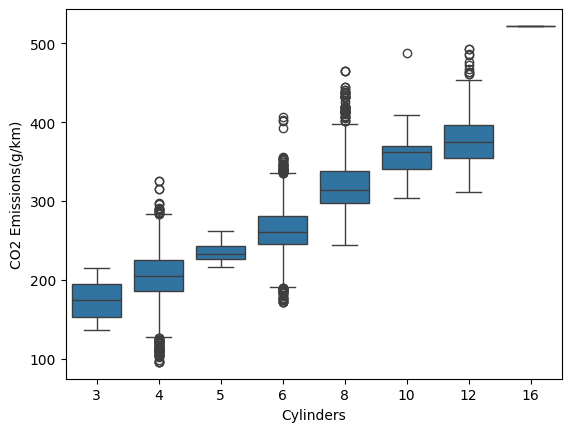

In [ ]:
sns.boxplot(x='Cylinders', y='CO2 Emissions(g/km)', data=df)

<Axes: xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

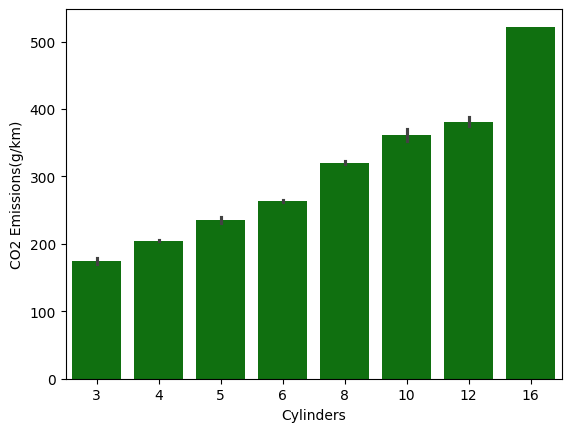

In [ ]:
sns.barplot(x='Cylinders', y='CO2 Emissions(g/km)', data=df, color='green')

# **Modeling Linear Regression**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df[['Fuel Consumption Comb (L/100 km)','Cylinders','Engine Size(L)', 'Fuel Type', 'Transmission']]
y = df['CO2 Emissions(g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = LR_model.predict(X_test)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R-squared score:", r2_score(y_test, y_pred))

Mean squared error: 342.5307257738388
R-squared score: 0.908798695910827


In [ ]:
print("Weight of each component respectively: ", LR_model.coef_)
print("Intercept of line: ", LR_model.intercept_)

Weight of each component respectively:  [14.38669082  4.03372005  5.85892247 10.10164706 -0.12601845]
Intercept of line:  20.157330879692267


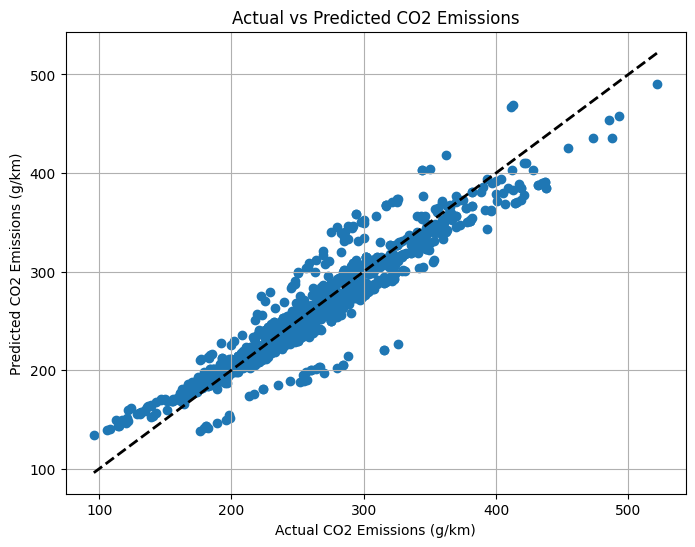

In [ ]:
# Plotting actual vs predicted CO2 emissions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'k--', lw=2)
plt.title('Actual vs Predicted CO2 Emissions')
plt.xlabel('Actual CO2 Emissions (g/km)')
plt.ylabel('Predicted CO2 Emissions (g/km)')
plt.grid(True)
plt.show()